In [127]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import math
import matplotlib.pyplot as plt
import random

In [149]:
df = pd.read_csv('GoogleStocks.csv')
del df['date']

df= df.convert_objects(convert_numeric=True)
df = df.drop([0])
label=df['open']
high=df['high'].values
df=df.drop(['close','open'],axis=1)
low=df['low'].values
average=(high+low)/2
df['average']=average

/home/shivangi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [150]:
df.head()

,volume,high,low,average
1,1894639.0,1202.8300,1176.720,1189.77500
2,1493841.0,1206.3975,1187.040,1196.71875
3,1668910.0,1230.0000,1202.825,1216.41250
4,1195899.0,1231.7900,1213.150,1222.47000
5,2089367.0,1227.1400,1196.170,1211.65500


In [151]:
label.head()

1    1198.53
2    1196.93
3    1226.32
4    1216.00
5    1197.35
Name: open, dtype: float64

In [152]:
features=df[['volume','average']]
label=np.array(label)
savedlabel=(label)
# label.shape
label=label.reshape(755,1)

In [153]:
features.head()

,volume,average
1,1894639.0,1189.77500
2,1493841.0,1196.71875
3,1668910.0,1216.41250
4,1195899.0,1222.47000
5,2089367.0,1211.65500


In [154]:
features=(features-np.mean(features))/np.std(features)

In [155]:
ml,stdl=np.mean(label),np.std(label)
print(label.shape)
label=(label-ml)/stdl
features=np.array(features)

(755, 1)


In [179]:
X_train = []
flen = len(features)
y_train = []
X_train1 = []
y_train1 = []
X_train2 = []
y_train2 = []
for i in range(20,flen):
    y_train.append(label[i,0])
    X_train.append(features[i-20:i,0:2])

In [180]:

for i in range(50, flen):
    y_train1.append(label[i,0])
    X_train1.append(features[i-50:i,0:2])


In [181]:

for i in range(75, flen):
    y_train2.append(label[i,0])
    X_train2.append(features[i-75:i,0:2])
    
    
X_train1=np.array(X_train1)
X_train=np.array(X_train)
y_train=np.array(y_train)
y_train1=np.array(y_train1)
X_train2=np.array(X_train2)
y_train2=np.array(y_train2)

In [183]:
def model(n,hc,X_trains):
    rnn = Sequential()
    X_trains=np.array(X_trains)
    X_trains.shape
    rnn.add(LSTM(units = hc, return_sequences=True, input_shape = (X_trains.shape[1], 2))) 
    rnn.add(Dropout(0.2))
    X_trains.shape
    if n == 3:
        rnn.add(LSTM(units = hc, return_sequences=True)) 
        rnn.add(Dropout(0.2))
    rnn.add(LSTM(units = hc)) 
    X_trains.shape
    rnn.add(Dropout(0.2))
    rnn.add(Dense(units=1))
    return rnn

In [184]:
def graphgmm(a,b,X_train,y_train,epoch):
    rnn = model(a,b,X_train)  
    rnn.compile(optimizer='adam', loss = 'mean_squared_error')   
    rnn.fit(X_train, y_train, epochs = epoch, batch_size = 16, validation_split = 0.2)
    next_stock = rnn.predict(X_train)
    psp=pd.DataFrame(next_stock)
    # psp.head()
    psp=(psp*stdl)+ml
    plt.plot(savedlabel[20:],color='red', label='Real Google Stock Price 2019')
    plt.plot(psp,color='blue', label='Predicted Google Stock Price 2019')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()

Train on 588 samples, validate on 147 samples
Epoch 1/20
588/588 [==============================] - 13s 23ms/step - loss: 0.2319 - val_loss: 0.0967
Epoch 2/20
588/588 [==============================] - 1s 1ms/step - loss: 0.0565 - val_loss: 0.0660
Epoch 3/20
588/588 [==============================] - 1s 1ms/step - loss: 0.0455 - val_loss: 0.0604
Epoch 4/20
588/588 [==============================] - 1s 1ms/step - loss: 0.0423 - val_loss: 0.0401
Epoch 5/20
588/588 [==============================] - 1s 1ms/step - loss: 0.0375 - val_loss: 0.0338
Epoch 6/20
588/588 [==============================] - 1s 1ms/step - loss: 0.0362 - val_loss: 0.0298
Epoch 7/20
588/588 [==============================] - 1s 1ms/step - loss: 0.0348 - val_loss: 0.0204
Epoch 8/20
588/588 [==============================] - 1s 1ms/step - loss: 0.0355 - val_loss: 0.0118
Epoch 9/20
588/588 [==============================] - 1s 1ms/step - loss: 0.0341 - val_loss: 0.0241
Epoch 10/20
588/588 [==============================]

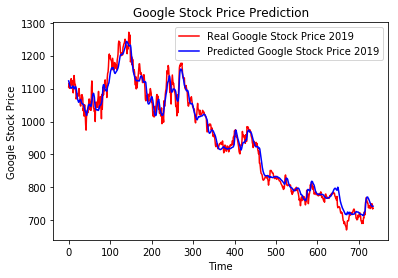

In [185]:
graphgmm(2,30,X_train,y_train,20)

Train on 588 samples, validate on 147 samples
Epoch 1/20
588/588 [==============================] - 11s 20ms/step - loss: 0.1401 - val_loss: 0.0130
Epoch 2/20
588/588 [==============================] - 1s 1ms/step - loss: 0.0382 - val_loss: 0.0457
Epoch 3/20
588/588 [==============================] - 1s 1ms/step - loss: 0.0387 - val_loss: 0.0359
Epoch 4/20
588/588 [==============================] - 1s 1ms/step - loss: 0.0348 - val_loss: 0.0175
Epoch 5/20
588/588 [==============================] - 1s 1ms/step - loss: 0.0322 - val_loss: 0.0258
Epoch 6/20
588/588 [==============================] - 1s 1ms/step - loss: 0.0323 - val_loss: 0.0337
Epoch 7/20
588/588 [==============================] - 1s 1ms/step - loss: 0.0313 - val_loss: 0.0138
Epoch 8/20
588/588 [==============================] - 1s 1ms/step - loss: 0.0287 - val_loss: 0.0253
Epoch 9/20
588/588 [==============================] - 1s 1ms/step - loss: 0.0279 - val_loss: 0.0088
Epoch 10/20
588/588 [==============================]

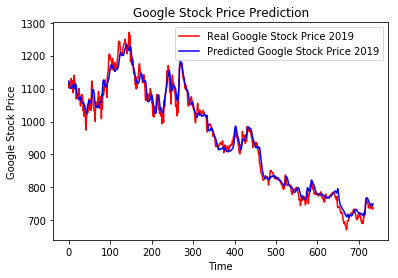

In [171]:
graphgmm(2,50,X_train,y_train,20)

Train on 588 samples, validate on 147 samples
Epoch 1/10
588/588 [==============================] - 12s 20ms/step - loss: 0.1340 - val_loss: 0.0161
Epoch 2/10
588/588 [==============================] - 1s 2ms/step - loss: 0.0375 - val_loss: 0.0408
Epoch 3/10
588/588 [==============================] - 1s 1ms/step - loss: 0.0319 - val_loss: 0.0400
Epoch 4/10
588/588 [==============================] - 1s 2ms/step - loss: 0.0312 - val_loss: 0.0191
Epoch 5/10
588/588 [==============================] - 1s 2ms/step - loss: 0.0308 - val_loss: 0.0075
Epoch 6/10
588/588 [==============================] - 1s 1ms/step - loss: 0.0309 - val_loss: 0.0165
Epoch 7/10
588/588 [==============================] - 1s 1ms/step - loss: 0.0292 - val_loss: 0.0150
Epoch 8/10
588/588 [==============================] - 1s 1ms/step - loss: 0.0273 - val_loss: 0.0074
Epoch 9/10
588/588 [==============================] - 1s 1ms/step - loss: 0.0247 - val_loss: 0.0301
Epoch 10/10
588/588 [==============================]

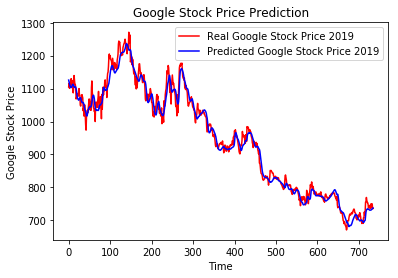

In [173]:
graphgmm(2,80,X_train,y_train,10)

Train on 564 samples, validate on 141 samples
Epoch 1/20
564/564 [==============================] - 14s 24ms/step - loss: 0.2888 - val_loss: 0.0151
Epoch 2/20
564/564 [==============================] - 1s 3ms/step - loss: 0.0485 - val_loss: 0.0866
Epoch 3/20
564/564 [==============================] - 1s 2ms/step - loss: 0.0429 - val_loss: 0.0459
Epoch 4/20
564/564 [==============================] - 2s 3ms/step - loss: 0.0422 - val_loss: 0.0432
Epoch 5/20
564/564 [==============================] - 1s 3ms/step - loss: 0.0416 - val_loss: 0.0362
Epoch 6/20
564/564 [==============================] - 1s 2ms/step - loss: 0.0386 - val_loss: 0.0310
Epoch 7/20
564/564 [==============================] - 1s 3ms/step - loss: 0.0374 - val_loss: 0.0132
Epoch 8/20
564/564 [==============================] - 1s 3ms/step - loss: 0.0365 - val_loss: 0.0169
Epoch 9/20
564/564 [==============================] - 1s 3ms/step - loss: 0.0352 - val_loss: 0.0127
Epoch 10/20
564/564 [==============================]

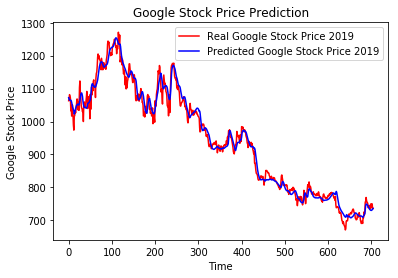

In [177]:
graphgmm(2,30,X_train1,y_train1,20)

Train on 564 samples, validate on 141 samples
Epoch 1/20
564/564 [==============================] - 15s 27ms/step - loss: 0.2564 - val_loss: 0.0133
Epoch 2/20
564/564 [==============================] - 2s 3ms/step - loss: 0.0428 - val_loss: 0.0297
Epoch 3/20
564/564 [==============================] - 2s 3ms/step - loss: 0.0387 - val_loss: 0.0220
Epoch 4/20
564/564 [==============================] - 1s 3ms/step - loss: 0.0358 - val_loss: 0.0176
Epoch 5/20
564/564 [==============================] - 1s 3ms/step - loss: 0.0342 - val_loss: 0.0351
Epoch 6/20
564/564 [==============================] - 2s 3ms/step - loss: 0.0351 - val_loss: 0.0448
Epoch 7/20
564/564 [==============================] - 2s 3ms/step - loss: 0.0337 - val_loss: 0.0491
Epoch 8/20
564/564 [==============================] - 2s 3ms/step - loss: 0.0312 - val_loss: 0.0294
Epoch 9/20
564/564 [==============================] - 2s 3ms/step - loss: 0.0304 - val_loss: 0.0112
Epoch 10/20
564/564 [==============================]

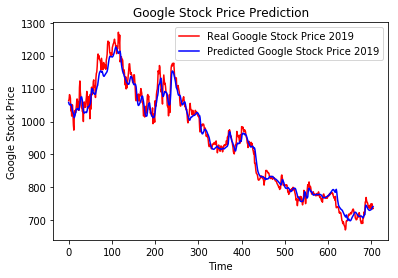

In [178]:
graphgmm(2,50,X_train1,y_train1,20)

Train on 564 samples, validate on 141 samples
Epoch 1/10
564/564 [==============================] - 4s 7ms/step - loss: 0.1184 - val_loss: 0.0330
Epoch 2/10
564/564 [==============================] - 2s 3ms/step - loss: 0.0283 - val_loss: 0.0338
Epoch 3/10
564/564 [==============================] - 2s 3ms/step - loss: 0.0250 - val_loss: 0.0306
Epoch 4/10
564/564 [==============================] - 2s 3ms/step - loss: 0.0244 - val_loss: 0.0375
Epoch 5/10
564/564 [==============================] - 2s 3ms/step - loss: 0.0236 - val_loss: 0.0271
Epoch 6/10
564/564 [==============================] - 2s 3ms/step - loss: 0.0265 - val_loss: 0.0265
Epoch 7/10
564/564 [==============================] - 2s 3ms/step - loss: 0.0205 - val_loss: 0.0346
Epoch 8/10
564/564 [==============================] - 2s 3ms/step - loss: 0.0215 - val_loss: 0.0242
Epoch 9/10
564/564 [==============================] - 2s 3ms/step - loss: 0.0206 - val_loss: 0.0271
Epoch 10/10
564/564 [==============================] -

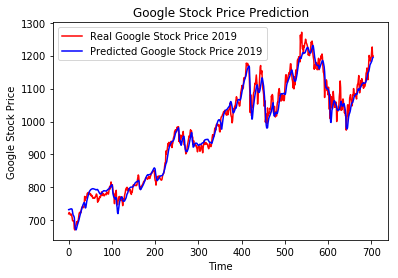

In [54]:
graphgmm(2,80,X_train1,y_train1,10)

Train on 544 samples, validate on 136 samples
Epoch 1/10
544/544 [==============================] - 4s 8ms/step - loss: 0.3133 - val_loss: 0.1258
Epoch 2/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0485 - val_loss: 0.0372
Epoch 3/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0421 - val_loss: 0.0519
Epoch 4/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0387 - val_loss: 0.0354
Epoch 5/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0360 - val_loss: 0.0329
Epoch 6/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0326 - val_loss: 0.0346
Epoch 7/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0325 - val_loss: 0.0331
Epoch 8/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0331 - val_loss: 0.0326
Epoch 9/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0286 - val_loss: 0.0359
Epoch 10/10
544/544 [==============================] -

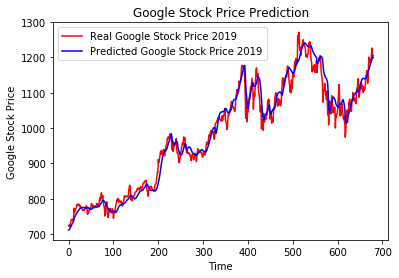

In [55]:
graphgmm(2,30,X_train2,y_train2,10)

Train on 544 samples, validate on 136 samples
Epoch 1/10
544/544 [==============================] - 5s 9ms/step - loss: 0.1710 - val_loss: 0.0361
Epoch 2/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0389 - val_loss: 0.0363
Epoch 3/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0366 - val_loss: 0.0510
Epoch 4/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0327 - val_loss: 0.0317
Epoch 5/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0285 - val_loss: 0.0366
Epoch 6/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0278 - val_loss: 0.0315
Epoch 7/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0275 - val_loss: 0.0317
Epoch 8/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0289 - val_loss: 0.0336
Epoch 9/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0261 - val_loss: 0.0284
Epoch 10/10
544/544 [==============================] -

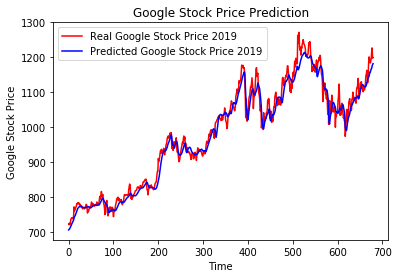

In [56]:
graphgmm(2,50,X_train2,y_train2,10)

Train on 544 samples, validate on 136 samples
Epoch 1/10
544/544 [==============================] - 5s 10ms/step - loss: 0.1361 - val_loss: 0.0525
Epoch 2/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0297 - val_loss: 0.0338
Epoch 3/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0276 - val_loss: 0.0418
Epoch 4/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0229 - val_loss: 0.0374
Epoch 5/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0243 - val_loss: 0.0324
Epoch 6/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0251 - val_loss: 0.0344
Epoch 7/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0261 - val_loss: 0.0294
Epoch 8/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0223 - val_loss: 0.0250
Epoch 9/10
544/544 [==============================] - 2s 4ms/step - loss: 0.0198 - val_loss: 0.0253
Epoch 10/10
544/544 [==============================] 

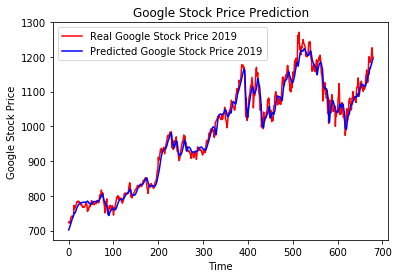

In [57]:
graphgmm(2,80,X_train2,y_train2,10)

Train on 588 samples, validate on 147 samples
Epoch 1/10
588/588 [==============================] - 5s 8ms/step - loss: 0.2754 - val_loss: 0.0468
Epoch 2/10
588/588 [==============================] - 1s 1ms/step - loss: 0.0574 - val_loss: 0.0525
Epoch 3/10
588/588 [==============================] - 1s 1ms/step - loss: 0.0503 - val_loss: 0.0500
Epoch 4/10
588/588 [==============================] - 1s 1ms/step - loss: 0.0415 - val_loss: 0.0761
Epoch 5/10
588/588 [==============================] - 1s 1ms/step - loss: 0.0411 - val_loss: 0.0374
Epoch 6/10
588/588 [==============================] - 1s 1ms/step - loss: 0.0413 - val_loss: 0.0586
Epoch 7/10
588/588 [==============================] - 1s 1ms/step - loss: 0.0363 - val_loss: 0.0416
Epoch 8/10
588/588 [==============================] - 1s 1ms/step - loss: 0.0404 - val_loss: 0.0345
Epoch 9/10
588/588 [==============================] - 1s 1ms/step - loss: 0.0320 - val_loss: 0.0347
Epoch 10/10
588/588 [==============================] -

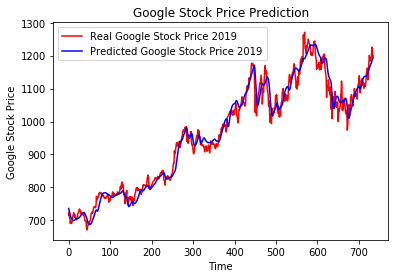

In [58]:
graphgmm(3,30,X_train,y_train,10)

Train on 588 samples, validate on 147 samples
Epoch 1/10
588/588 [==============================] - 6s 10ms/step - loss: 0.2523 - val_loss: 0.0467
Epoch 2/10
588/588 [==============================] - 1s 2ms/step - loss: 0.0520 - val_loss: 0.0433
Epoch 3/10
588/588 [==============================] - 1s 2ms/step - loss: 0.0410 - val_loss: 0.0387
Epoch 4/10
588/588 [==============================] - 1s 2ms/step - loss: 0.0393 - val_loss: 0.0406
Epoch 5/10
588/588 [==============================] - 1s 2ms/step - loss: 0.0412 - val_loss: 0.0374
Epoch 6/10
588/588 [==============================] - 1s 2ms/step - loss: 0.0372 - val_loss: 0.0370
Epoch 7/10
588/588 [==============================] - 1s 2ms/step - loss: 0.0365 - val_loss: 0.0461
Epoch 8/10
588/588 [==============================] - 1s 2ms/step - loss: 0.0347 - val_loss: 0.0424
Epoch 9/10
588/588 [==============================] - 1s 2ms/step - loss: 0.0337 - val_loss: 0.0371
Epoch 10/10
588/588 [==============================] 

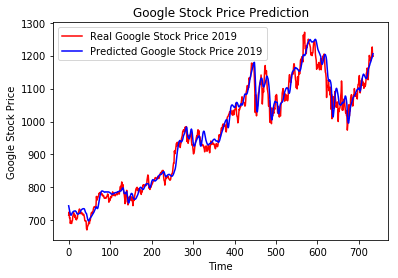

In [59]:
graphgmm(3,50,X_train,y_train,10)

Train on 588 samples, validate on 147 samples
Epoch 1/10
588/588 [==============================] - 6s 10ms/step - loss: 0.1538 - val_loss: 0.0403
Epoch 2/10
588/588 [==============================] - 1s 2ms/step - loss: 0.0359 - val_loss: 0.0400
Epoch 3/10
588/588 [==============================] - 1s 2ms/step - loss: 0.0371 - val_loss: 0.0345
Epoch 4/10
588/588 [==============================] - 1s 2ms/step - loss: 0.0321 - val_loss: 0.0501
Epoch 5/10
588/588 [==============================] - 1s 2ms/step - loss: 0.0352 - val_loss: 0.0519
Epoch 6/10
588/588 [==============================] - 1s 2ms/step - loss: 0.0279 - val_loss: 0.0325
Epoch 7/10
588/588 [==============================] - 1s 2ms/step - loss: 0.0260 - val_loss: 0.0314
Epoch 8/10
588/588 [==============================] - 1s 2ms/step - loss: 0.0266 - val_loss: 0.0409
Epoch 9/10
588/588 [==============================] - 1s 2ms/step - loss: 0.0256 - val_loss: 0.0377
Epoch 10/10
588/588 [==============================] 

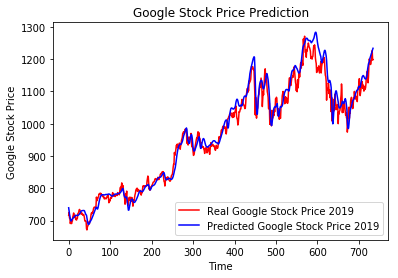

In [60]:
graphgmm(3,80,X_train,y_train,10)

Train on 564 samples, validate on 141 samples
Epoch 1/20
564/564 [==============================] - 7s 12ms/step - loss: 0.3315 - val_loss: 0.0528
Epoch 2/20
564/564 [==============================] - 2s 3ms/step - loss: 0.0658 - val_loss: 0.0463
Epoch 3/20
564/564 [==============================] - 2s 3ms/step - loss: 0.0534 - val_loss: 0.0434
Epoch 4/20
564/564 [==============================] - 2s 3ms/step - loss: 0.0454 - val_loss: 0.0439
Epoch 5/20
564/564 [==============================] - 2s 3ms/step - loss: 0.0501 - val_loss: 0.0450
Epoch 6/20
564/564 [==============================] - 2s 3ms/step - loss: 0.0505 - val_loss: 0.0501
Epoch 7/20
564/564 [==============================] - 2s 3ms/step - loss: 0.0389 - val_loss: 0.0549
Epoch 8/20
564/564 [==============================] - 2s 4ms/step - loss: 0.0413 - val_loss: 0.0497
Epoch 9/20
564/564 [==============================] - 2s 3ms/step - loss: 0.0406 - val_loss: 0.0725
Epoch 10/20
564/564 [==============================] 

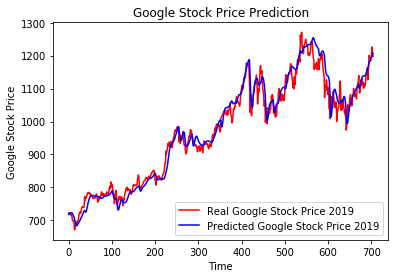

In [61]:
graphgmm(3,30,X_train1,y_train1,20)

Train on 564 samples, validate on 141 samples
Epoch 1/10
564/564 [==============================] - 7s 13ms/step - loss: 0.2187 - val_loss: 0.0463
Epoch 2/10
564/564 [==============================] - 2s 4ms/step - loss: 0.0481 - val_loss: 0.0435
Epoch 3/10
564/564 [==============================] - 2s 4ms/step - loss: 0.0445 - val_loss: 0.0475
Epoch 4/10
564/564 [==============================] - 2s 4ms/step - loss: 0.0407 - val_loss: 0.0478
Epoch 5/10
564/564 [==============================] - 2s 4ms/step - loss: 0.0327 - val_loss: 0.0381
Epoch 6/10
564/564 [==============================] - 2s 4ms/step - loss: 0.0362 - val_loss: 0.0401
Epoch 7/10
564/564 [==============================] - 2s 4ms/step - loss: 0.0344 - val_loss: 0.0375
Epoch 8/10
564/564 [==============================] - 2s 4ms/step - loss: 0.0339 - val_loss: 0.0479
Epoch 9/10
564/564 [==============================] - 2s 4ms/step - loss: 0.0276 - val_loss: 0.0350
Epoch 10/10
564/564 [==============================] 

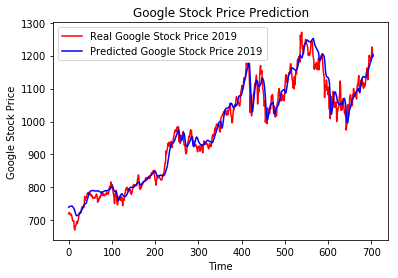

In [62]:
graphgmm(3,50,X_train1,y_train1,10)

Train on 564 samples, validate on 141 samples
Epoch 1/10
564/564 [==============================] - 8s 14ms/step - loss: 0.1707 - val_loss: 0.0474
Epoch 2/10
564/564 [==============================] - 2s 4ms/step - loss: 0.0365 - val_loss: 0.0414
Epoch 3/10
564/564 [==============================] - 2s 4ms/step - loss: 0.0382 - val_loss: 0.0422
Epoch 4/10
564/564 [==============================] - 2s 4ms/step - loss: 0.0352 - val_loss: 0.0427
Epoch 5/10
564/564 [==============================] - 2s 4ms/step - loss: 0.0346 - val_loss: 0.0496
Epoch 6/10
564/564 [==============================] - 2s 4ms/step - loss: 0.0306 - val_loss: 0.0495
Epoch 7/10
564/564 [==============================] - 2s 4ms/step - loss: 0.0276 - val_loss: 0.0456
Epoch 8/10
564/564 [==============================] - 2s 4ms/step - loss: 0.0263 - val_loss: 0.0360
Epoch 9/10
564/564 [==============================] - 2s 4ms/step - loss: 0.0258 - val_loss: 0.0363
Epoch 10/10
564/564 [==============================] 

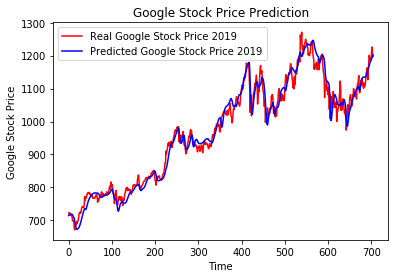

In [63]:
graphgmm(3,80,X_train1,y_train1,10)

Train on 544 samples, validate on 136 samples
Epoch 1/10
544/544 [==============================] - 10s 19ms/step - loss: 0.2661 - val_loss: 0.0529
Epoch 2/10
544/544 [==============================] - 3s 5ms/step - loss: 0.0627 - val_loss: 0.0619
Epoch 3/10
544/544 [==============================] - 3s 5ms/step - loss: 0.0568 - val_loss: 0.0491
Epoch 4/10
544/544 [==============================] - 3s 5ms/step - loss: 0.0472 - val_loss: 0.0519
Epoch 5/10
544/544 [==============================] - 3s 5ms/step - loss: 0.0401 - val_loss: 0.0499
Epoch 6/10
544/544 [==============================] - 3s 5ms/step - loss: 0.0451 - val_loss: 0.0438
Epoch 7/10
544/544 [==============================] - 3s 5ms/step - loss: 0.0434 - val_loss: 0.0415
Epoch 8/10
544/544 [==============================] - 3s 5ms/step - loss: 0.0410 - val_loss: 0.0993
Epoch 9/10
544/544 [==============================] - 3s 5ms/step - loss: 0.0425 - val_loss: 0.0405
Epoch 10/10
544/544 [==============================]

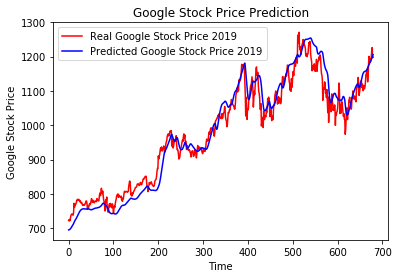

In [64]:
graphgmm(3,30,X_train2,y_train2,10)

Train on 544 samples, validate on 136 samples
Epoch 1/10
544/544 [==============================] - 9s 17ms/step - loss: 0.1863 - val_loss: 0.0441
Epoch 2/10
544/544 [==============================] - 3s 5ms/step - loss: 0.0436 - val_loss: 0.0446
Epoch 3/10
544/544 [==============================] - 3s 5ms/step - loss: 0.0384 - val_loss: 0.0420
Epoch 4/10
544/544 [==============================] - 3s 5ms/step - loss: 0.0375 - val_loss: 0.0398
Epoch 5/10
544/544 [==============================] - 3s 5ms/step - loss: 0.0373 - val_loss: 0.0382
Epoch 6/10
544/544 [==============================] - 3s 5ms/step - loss: 0.0320 - val_loss: 0.0521
Epoch 7/10
544/544 [==============================] - 3s 5ms/step - loss: 0.0339 - val_loss: 0.0364
Epoch 8/10
544/544 [==============================] - 3s 5ms/step - loss: 0.0327 - val_loss: 0.0378
Epoch 9/10
544/544 [==============================] - 3s 5ms/step - loss: 0.0281 - val_loss: 0.0432
Epoch 10/10
544/544 [==============================] 

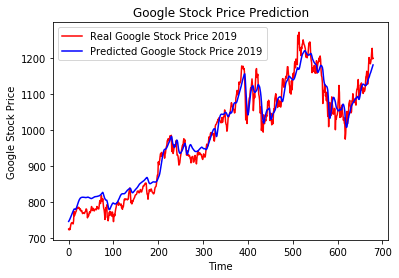

In [65]:
graphgmm(3,50,X_train2,y_train2,10)

Train on 544 samples, validate on 136 samples
Epoch 1/10
544/544 [==============================] - 10s 19ms/step - loss: 0.1394 - val_loss: 0.0553
Epoch 2/10
544/544 [==============================] - 3s 6ms/step - loss: 0.0386 - val_loss: 0.0385
Epoch 3/10
544/544 [==============================] - 3s 6ms/step - loss: 0.0360 - val_loss: 0.0394
Epoch 4/10
544/544 [==============================] - 3s 6ms/step - loss: 0.0344 - val_loss: 0.0370
Epoch 5/10
544/544 [==============================] - 3s 6ms/step - loss: 0.0309 - val_loss: 0.0353
Epoch 6/10
544/544 [==============================] - 3s 6ms/step - loss: 0.0263 - val_loss: 0.0484
Epoch 7/10
544/544 [==============================] - 3s 6ms/step - loss: 0.0267 - val_loss: 0.0366
Epoch 8/10
544/544 [==============================] - 3s 6ms/step - loss: 0.0278 - val_loss: 0.0309
Epoch 9/10
544/544 [==============================] - 3s 6ms/step - loss: 0.0241 - val_loss: 0.0480
Epoch 10/10
544/544 [==============================]

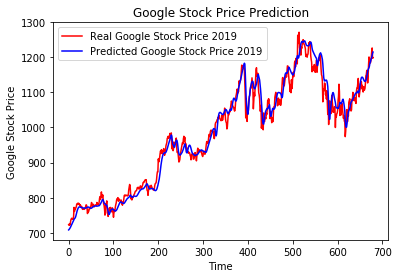

In [66]:
graphgmm(3,80,X_train2,y_train2,10)